---

# Relationship between Win Ratio and Gross Income, Real Estate Ownership

Faraz Kamal

May 19, 2019

---

## Introduction
The goal of this exercise is to explore the relationship between win ratio and financial indicators like adjusted gross income and real estate taxes paid. It's plausible that schools in neighborhoods with higher average income, higher home ownership, and more expensive houses would produce better teams for the robotics competition. We'll use federal tax data to explore this question. Tax data is not available by team. It's available by zip code though. Therefore, the specific question we'll be exploring is: Can average adjusted gross income (AGI) and average real estate taxes atleast partly explain the win ratio for a zip code.

## Data
We'll use the teams and matchdetails data provided with the assessment. The teams data has zipcode for every team, and the matchdetails data provides win/loss counts for the teams.

We'll also use the publicly available IRS data that provides adjusted gross income and real estate taxes  by every zipcode in the US. 2016 is the latest year for which this data is available. So we'll use that. This data can be acquired at:
https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi

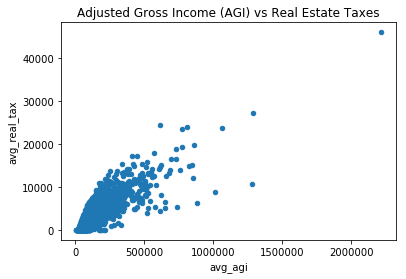

In [19]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# load zip code data
zips = pandas.read_csv('zips.csv', index_col = 'zipcode')

# compute average AGI and average real estate tax
zips = zips.groupby(by='zipcode').sum()
zips['avg_agi'] = zips['A00100']/zips['N1'] * 1000
zips['avg_real_tax'] = zips['A18500']/zips['N1'] * 1000

# vizualize AGI vs real estate tax
plot = zips.plot.scatter(x='avg_agi', y='avg_real_tax')
title = plt.title("Adjusted Gross Income (AGI) vs Real Estate Taxes")

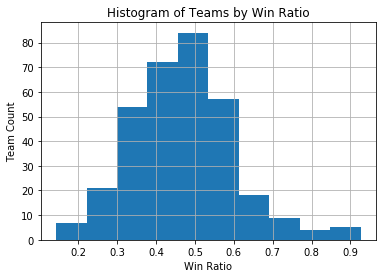

In [20]:
# load teams data
teams = pandas.read_csv('teams.csv', index_col = 'key', usecols = ['key', 'postal_code'])
teams['zipcode'] = teams['postal_code']
teams['losses'] = 0
teams['wins'] = 0
# zips = zips.merge(teams, on='zipcode', how='inner') 

matchdetails = pandas.read_csv('matchdetails.csv')

for index, matchdetail in matchdetails.iterrows():
    if matchdetail['winning_alliance'] == 'red':
        redColToIncrement = 'wins'
        blueColToIncrement = 'losses'
    else:
        redColToIncrement = 'losses'
        blueColToIncrement = 'wins'
    
    teams.loc[matchdetail['red.robot1']][redColToIncrement] = teams.loc[matchdetail['red.robot1']][redColToIncrement] + 1;
    teams.loc[matchdetail['red.robot2']][redColToIncrement] = teams.loc[matchdetail['red.robot2']][redColToIncrement] + 1;
    teams.loc[matchdetail['red.robot3']][redColToIncrement] = teams.loc[matchdetail['red.robot3']][redColToIncrement] + 1;
    teams.loc[matchdetail['blue.robot1']][blueColToIncrement] = teams.loc[matchdetail['blue.robot1']][blueColToIncrement] + 1;
    teams.loc[matchdetail['blue.robot2']][blueColToIncrement] = teams.loc[matchdetail['blue.robot2']][blueColToIncrement] + 1;
    teams.loc[matchdetail['blue.robot3']][blueColToIncrement] = teams.loc[matchdetail['blue.robot3']][blueColToIncrement] + 1;

teams['win_rate']=teams['wins']/(teams['wins'] + teams['losses'])
hist = teams.hist(column='win_rate')
title = plt.title("Histogram of Teams by Win Ratio")
for ax in hist.flatten():
    ax.set_xlabel("Win Ratio")
    ax.set_ylabel("Team Count")

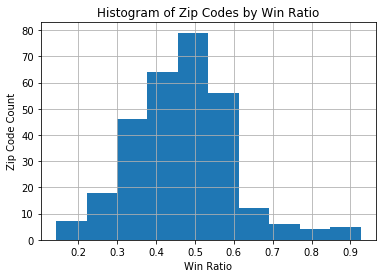

In [21]:
zip_stats = teams.groupby(by='zipcode').sum()
zip_stats = zip_stats.drop(columns=['postal_code'])
zip_stats['win_rate']=zip_stats['wins']/(zip_stats['wins'] + zip_stats['losses'])
hist = zip_stats.hist(column='win_rate')
title = plt.title("Histogram of Zip Codes by Win Ratio")
for ax in hist.flatten():
    ax.set_xlabel("Win Ratio")
    ax.set_ylabel("Zip Code Count")

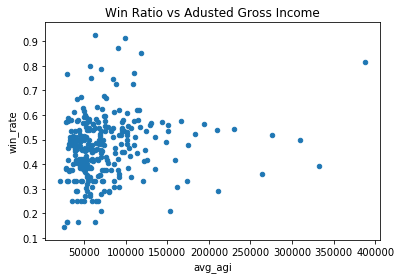

In [22]:
data = zips.merge(zip_stats, on='zipcode', how='inner')
data = data[data['win_rate'] > 0]
plot = data.plot.scatter(x='avg_agi', y='win_rate')
title = plt.title("Win Ratio vs Adusted Gross Income")

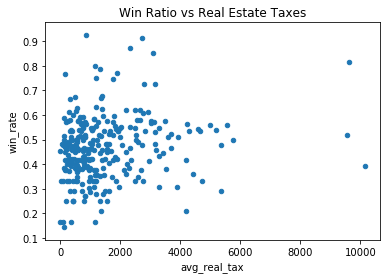

In [23]:
plot = data.plot.scatter(x='avg_real_tax', y='win_rate')
title = plt.title("Win Ratio vs Real Estate Taxes")

In [24]:
x = np.asarray(data['avg_agi']).reshape((-1, 1))
y = data['win_rate']
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('Simple linear regression by Average Gross Income: r-squared:', r_sq)

Simple linear regression by Average Gross Income: r-squared: 0.027301864716569146


In [25]:
x = np.asarray(data['avg_real_tax']).reshape((-1, 1))
y = data['win_rate']
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('Simple linear regression by Average Real Estate Tax: r-squared:', r_sq)

Simple linear regression by Average Real Estate Tax: r-squared: 0.030764251393222697


In [26]:
x = np.asarray(data[['avg_agi', 'avg_real_tax']])
y = np.asarray(data['win_rate'])
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('Multiple linear regression: r-squared:', r_sq)

Multiple linear regression: r-squared: 0.03076427423312267


## Findings
* There seems to be a strong correlation between average adjusted gross income (AGI) and the average real estate taxes per household.
* The distribution of teams by win ratio is quite normal.
* The distribution of zip codes by win ratio is quite normal.
* Simple linear regression by Average Adjusted Gross Income: r-squared: 0.027
* Simple linear regression by Average Real Estate Tax: r-squared: 0.031
* Multiple linear regression: r-squared: 0.031

## Conclusion
The low r-squared numbers suggestion that there's little to no correlation between a zip code's win ratio and the adjusted gross income or real estate taxes for that zip code.

## Appendix
IRS data: https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi
        